In [1]:
import numpy as np
import pandas as pd

In [2]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
df = pd.read_csv("emotion-text-dataset/emotion_dataset.csv")
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [4]:
# drop "shame" to uniform the labels
df = df[df["Emotion"] != "shame"]

In [5]:
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
Name: Emotion, dtype: int64

In [6]:
# making the labeling same as the speech
emotion_to_id_convert = {
    "surprise": 0,
    "neutral": 1,
    "joy": 2,
    "sadness": 3,
    "anger": 4,
    "fear": 5,
    "disgust": 6
}

emotions_dict = {
    0: 'surprised',
    1: 'neutral',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fearful',
    6: 'disgust'
}

In [7]:
df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])
df.head()

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_53628/4020174303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])


,Unnamed: 0,Emotion,Text,Clean_Text,Emotion_uniform
0,0,neutral,Why ?,NaN,1
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,2
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,3
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,2
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,2


In [8]:
# impute any nan text to empty string
df["Clean_Text"] = df["Clean_Text"].fillna("")

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_53628/342736732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text"] = df["Clean_Text"].fillna("")


In [9]:
df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_53628/3318117705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)


In [10]:
df

,Text,Emotion_uniform
0,Why ?,1
1,Sage Act upgrade on my to do list for tommorow.,2
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3
3,Such an eye ! The true hazel eye-and so brill...,2
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,0
34788,The world didnt give it to me..so the world MO...,2
34789,A man robbed me today .,4
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",5


Doing text cleaning on our own

In [11]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
detokenizer = TreebankWordDetokenizer()

In [12]:
def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    # remove stopwords
    text = [token for token in text if token not in stop_words]
    # lemmatizer
    text = [lemmatizer.lemmatize(token) for token in text]

    return detokenizer.detokenize(text).strip()

In [13]:
df["Clean_Text"] = df["Text"].progress_apply(clean_text)

  0%|          | 0/34646 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_53628/1937477319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text"] = df["Text"].progress_apply(clean_text)


In [14]:
df.head()

,Text,Emotion_uniform,Clean_Text
0,Why ?,1,Why
1,Sage Act upgrade on my to do list for tommorow.,2,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,2,Such eye The true hazel eyeand brilliant Regul...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2,Iluvmiasantos ugh babe hugggzzz u babe naamaze...


# Map Text to Embedding Dimension

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.95, min_df=5)

In [16]:
y = df["Emotion_uniform"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# note that sometimes using "Text" instead of "Clean_Text" column yields better result

In [19]:
X_train, X_val, y_train, y_val = train_test_split(df["Clean_Text"], y, random_state=3407, test_size=0.2, stratify=y)

In [20]:
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [21]:
# import tensorflow_hub as hub

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# use_model = hub.load(module_url)
# X_train = use_model(X_train).numpy()
# X_val = use_model(X_val).numpy()

In [22]:
X_train.shape

(27716, 8506)

Check if y label is distributed correctly

In [23]:
y_train.value_counts().sort_index()

0    3250
1    1803
2    8836
3    5377
4    3437
5    4328
6     685
Name: Emotion_uniform, dtype: int64

In [24]:
y_val.value_counts().sort_index()

0     812
1     451
2    2209
3    1345
4     860
5    1082
6     171
Name: Emotion_uniform, dtype: int64

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader

In [26]:
from utils import torch_device_seed, check_gpu, clear_device_cache

In [27]:
np.random.seed(3407)
torch.manual_seed(3407)
torch_device_seed(3407)

In [28]:
y_val.to_numpy()

array([2, 2, 4, ..., 3, 2, 2])

In [29]:
class EmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        # labels none for test data that doesn't have labels
        self.data = data.toarray().astype(np.float32)
        self.labels = labels.to_numpy() if labels is not None else np.zeros(data.shape[0])


    def __len__(self):
        return self.data.shape[0]


    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [30]:
train_ds = EmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

val_ds = EmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

In [31]:
for x in train_loader:
    print(x[0].shape)
    break

torch.Size([16, 8506])


# Modelling

In [32]:
import gc
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [33]:
device = check_gpu()

In [34]:
device

device(type='mps')

## Linear Model

In [35]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self).__init__()

        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = F.relu(self.linear1(inputs))
        output = F.relu(self.linear2(output))
        output = self.dropout1(output)
        output = F.softmax(self.linear3(output), dim=1)

        return output

In [36]:
linear_model = SimpleLinearModel(input_size=X_train.shape[1], output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001, weight_decay=1e-5)

In [37]:
EPOCHS = 20

In [167]:
def fit(model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        total = 0
        correct = 0
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            optimizer.zero_grad()
    
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item() 

            _, predicted = torch.max(outputs.data, axis=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # get train loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
        # get test loss and accuracy
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            model.eval()
            for data in val_loader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, axis=1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}: train_loss: {train_loss:.4f}; train_accuracy: {train_accuracy:.4f}; val_loss: {val_loss:.4f}; val_accuracy: {val_accuracy:.4f}")

    return {
        "train_loss": train_losses,
        "train_accuracy": train_accuracies,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }

In [39]:
clear_device_cache()

In [40]:
linear_model_result = fit(linear_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.1052; train_accuracy: 0.4815; val_loss: 1.5955; val_accuracy: 0.5685
Epoch 1: train_loss: 0.0961; train_accuracy: 0.6275; val_loss: 1.5805; val_accuracy: 0.5763
Epoch 2: train_loss: 0.0928; train_accuracy: 0.6857; val_loss: 1.5532; val_accuracy: 0.6098
Epoch 3: train_loss: 0.0903; train_accuracy: 0.7247; val_loss: 1.5443; val_accuracy: 0.6179
Epoch 4: train_loss: 0.0890; train_accuracy: 0.7432; val_loss: 1.5412; val_accuracy: 0.6215
Epoch 5: train_loss: 0.0879; train_accuracy: 0.7610; val_loss: 1.5428; val_accuracy: 0.6188
Epoch 6: train_loss: 0.0872; train_accuracy: 0.7726; val_loss: 1.5378; val_accuracy: 0.6242
Epoch 7: train_loss: 0.0865; train_accuracy: 0.7838; val_loss: 1.5430; val_accuracy: 0.6176
Epoch 8: train_loss: 0.0860; train_accuracy: 0.7917; val_loss: 1.5449; val_accuracy: 0.6175
Epoch 9: train_loss: 0.0856; train_accuracy: 0.7980; val_loss: 1.5483; val_accuracy: 0.6133
Epoch 10: train_loss: 0.0853; train_accuracy: 0.8040; val_loss: 1.5461; val_accu

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

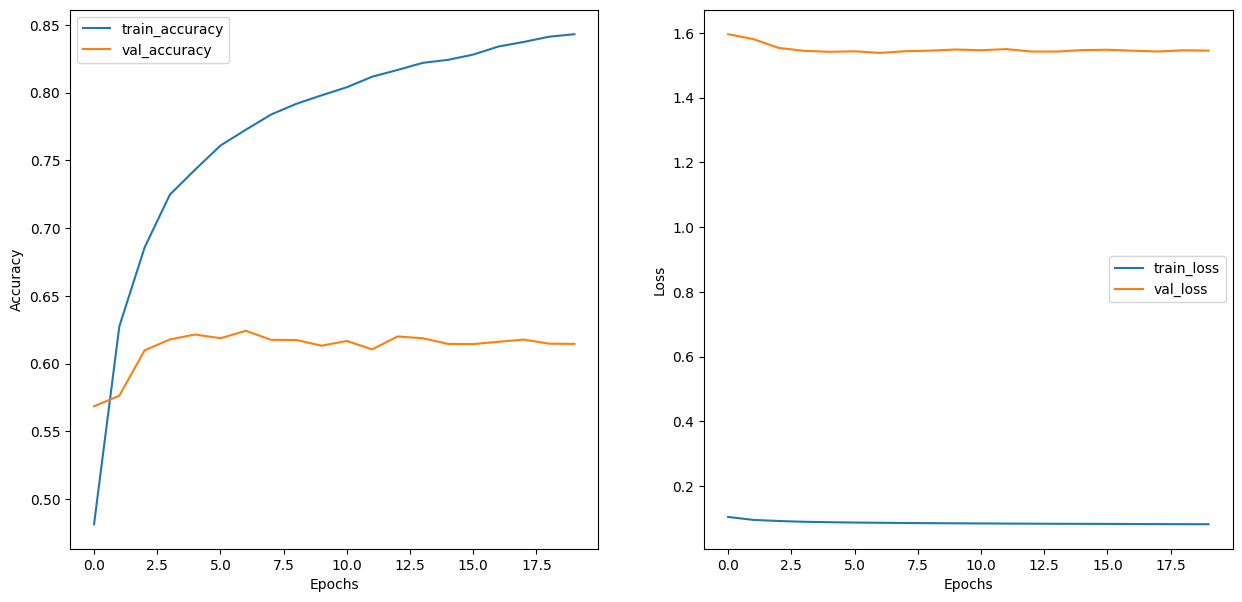

In [42]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(linear_model_result["train_accuracy"], label="train_accuracy")
plt.plot(linear_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(linear_model_result["train_loss"], label="train_loss")
plt.plot(linear_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [43]:
import datetime
PATH = f"models/torch_text_linear_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(linear_model.state_dict(), PATH)

# load model, UNCOMMENT this so no need to train again
# model = torch.load(PATH)

models/torch_text_linear_model_2024.06.07.16.22.58.pth


## Recurrent Model
start with the dataset first

In [65]:
from torch.nn.utils.rnn import pad_sequence
from torchtext.vocab import build_vocab_from_iterator
from collections import Counter

In [62]:
selected_column = "Clean_Text"

In [63]:
X_train, X_val, y_train, y_val = train_test_split(df[selected_column], y, random_state=3407, test_size=0.2, stratify=y)

In [103]:
class TextEmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        self.texts = data.apply(word_tokenize).tolist()
        self.labels = labels.to_list()

        self.vocab = self.build_vocab(self.texts)
        # convert texts to tensor
        self.texts = [torch.tensor(self.vocab(text), dtype=torch.long) for text in self.texts]


    def build_vocab(self, texts):
        counter = Counter()
        for text in texts:
            counter.update(text)
        return build_vocab_from_iterator([counter.keys()], specials=['<unk>', '<pad>'])


    def __len__(self):
        return len(self.texts)


    def __getitem__(self, index):
        text = self.texts[index]
        label = torch.tensor(self.labels[index], dtype=torch.long)
        return text, label

In [141]:
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=1)  # Padding with <pad> token index 1
    labels = torch.stack(labels)
    return texts_padded, labels

In [142]:
train_ds = TextEmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, collate_fn=collate_fn)

val_ds = TextEmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False, collate_fn=collate_fn)

In [143]:
vocab_size = len(train_ds.vocab)
vocab_size

39753

In [178]:
for x in val_loader:
    print(x[0].shape)
    break

torch.Size([16, 16])


In [236]:
class RecurrentModel(nn.Module):
    def __init__(self, vocab_size, output_size):
        super(RecurrentModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128)
        self.lstm = nn.LSTM(128, hidden_size=64, num_layers=2, bidirectional=True, dropout=0.1)

        self.linear1 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.linear2 = nn.Linear(64, output_size)


    def forward(self, input_text):
        embedding_output = self.embedding(input_text)

        lstm_output, (hidden_state, cell_state) = self.lstm(embedding_output)

        # final_hidden_state = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1)

        # print(final_hidden_state.shape, cell_state.shape, lstm_output.shape, hidden_state.shape)

        output = F.relu(self.linear1(lstm_output[:, -1]))
        # output = F.relu(self.linear1(final_hidden_state))
        output = self.dropout1(output)
        output = self.linear2(output)

        # print(torch.max(output.data, axis=1)) # it almost always predicts emotion 2

        return output

In [237]:
rnn_model = RecurrentModel(vocab_size, output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [238]:
rnn_model_result = fit(rnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.1102; train_accuracy: 0.3177; val_loss: 1.7501; val_accuracy: 0.3166
Epoch 1: train_loss: 0.1098; train_accuracy: 0.3184; val_loss: 1.7481; val_accuracy: 0.3188


KeyboardInterrupt: 

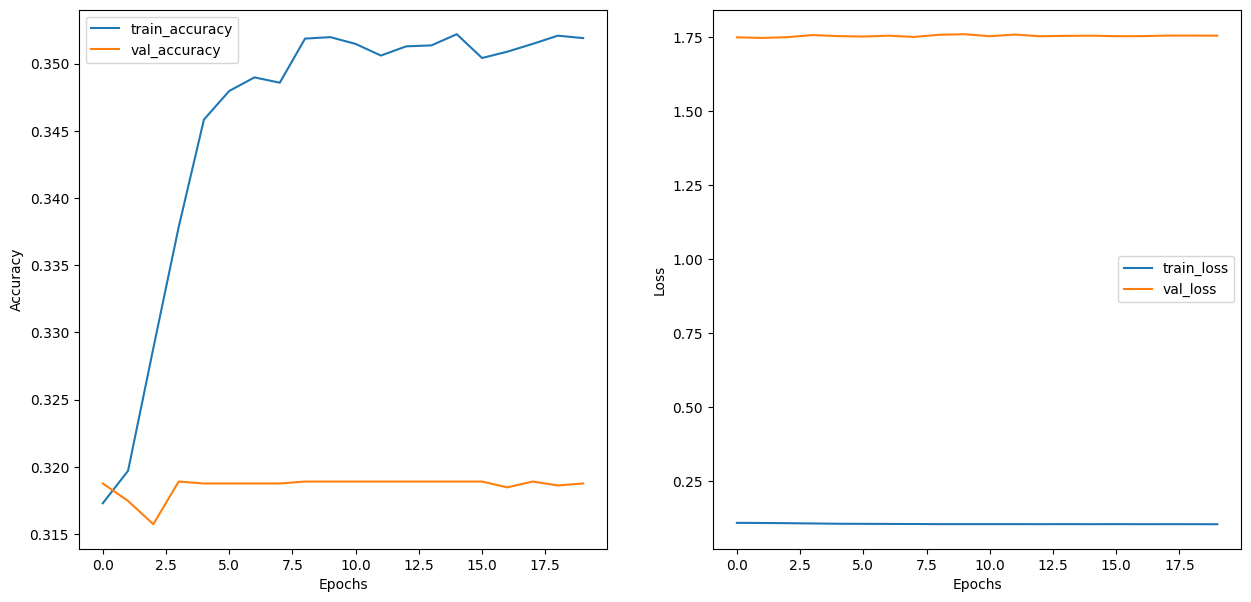

In [187]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(rnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(rnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_model_result["train_loss"], label="train_loss")
plt.plot(rnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Predict

In [198]:
def predict_one(model, text, label=None):
    # text_embedding = use_model([text]).numpy()
    text_embedding = vectorizer.transform([text]).toarray().astype(np.float32)

    with torch.no_grad():
        model.eval()
        outputs = model(torch.tensor(text_embedding).to(device))
        _, predicted = torch.max(outputs.data, axis=1)
    
        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [199]:
predict_one(linear_model, "I hate this country")

Detected Emotion: neutral


In [202]:
val_data_test = np.random.choice(y_val.index)
test_sample = df.loc[val_data_test]
test_sample

Text               I suppose I am happy being so ` tiny' ; it mea...
Emotion_uniform                                                    2
Clean_Text         I suppose I happy tiny mean I able surprise pe...
Name: 18488, dtype: object

In [203]:
predict_one(linear_model, test_sample["Clean_Text"], test_sample["Emotion_uniform"])

Detected Emotion: happy
Actual Emotion  : happy
